In [44]:
# Packages importieren
import joblib
from pandas.core.common import random_state
from tqdm import tqdm

import shap
import lime
from lime.lime_tabular import LimeTabularExplainer

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [45]:
# Datenabrufen
X_train = pd.read_csv("../Resampling/X_train.csv", index_col=0)
X_test = pd.read_csv("../Resampling/X_test.csv", index_col=0)
X_val = pd.read_csv("../Resampling/X_val.csv", index_col=0)

X_train_stm = pd.read_csv("../Resampling/X_train_stm.csv", index_col=0)
X_test_stm = pd.read_csv("../Resampling/X_test_stm.csv", index_col=0)
X_val_stm = pd.read_csv("../Resampling/X_val_stm.csv", index_col=0)

y_train = pd.read_csv("../Resampling/y_train.csv", index_col=0)
y_train_stm = pd.read_csv("../Resampling/y_train_stm.csv", index_col=0)

y_test = pd.read_csv("../Resampling/y_test.csv", index_col=0)
y_val = pd.read_csv("../Resampling/y_val.csv", index_col=0)

print("Alle Datensätze wurden importiert.")

Alle Datensätze wurden importiert.


In [46]:
# Path vorbereiten und Model importieren
modell = joblib.load('../Modelle/LogReg-Model/logreg.pkl')

In [47]:
# Beobachtung Nr. 27174
print(X_test.iloc[2])
print(y_test.iloc[2])

BMI                    -0.242451
MentHlth               -0.450466
PhysHlth               -0.512607
HighBP                  0.000000
HighChol                0.000000
CholCheck               1.000000
Smoker                  0.000000
Stroke                  0.000000
HeartDiseaseorAttack    0.000000
PhysActivity            1.000000
Fruits                  1.000000
Veggies                 1.000000
HvyAlcoholConsump       0.000000
AnyHealthcare           1.000000
NoDocbcCost             0.000000
GenHlth                 2.000000
DiffWalk                0.000000
Sex                     0.000000
Age                     5.000000
Education               5.000000
Income                  8.000000
Name: 27174, dtype: float64
Diabetes_binary    0
Name: 27174, dtype: int64


In [48]:
# Perturbieren Nr. 27174 positive Änderung
obs_original_1 = X_test.iloc[2]
obs_1p = obs_original_1.copy()

obs_1p.iloc[0:3] = obs_1p.iloc[0:3] * 0.95
obs_1p['GenHlth'] = obs_1p['GenHlth'] - 1
obs_1p['Age'] = obs_1p['Age'] - 1
obs_1p['Education'] = obs_1p['Education'] + 1
obs_1p['Income'] = obs_1p['Income'] + 0 # Schon höchsten

print(obs_1p)

BMI                    -0.230328
MentHlth               -0.427943
PhysHlth               -0.486977
HighBP                  0.000000
HighChol                0.000000
CholCheck               1.000000
Smoker                  0.000000
Stroke                  0.000000
HeartDiseaseorAttack    0.000000
PhysActivity            1.000000
Fruits                  1.000000
Veggies                 1.000000
HvyAlcoholConsump       0.000000
AnyHealthcare           1.000000
NoDocbcCost             0.000000
GenHlth                 1.000000
DiffWalk                0.000000
Sex                     0.000000
Age                     4.000000
Education               6.000000
Income                  8.000000
Name: 27174, dtype: float64


In [49]:
# Perturbieren Nr. 27174 negative Änderung
obs_original_1 = X_test.iloc[2]
obs_1n = obs_original_1.copy()

obs_1n.iloc[0:3] = obs_1n.iloc[0:3] * 1.05
obs_1n['GenHlth'] = obs_1n['GenHlth'] + 1
obs_1n['Age'] = obs_1n['Age'] + 1
obs_1n['Education'] = obs_1n['Education'] - 1
obs_1n['Income'] = obs_1n['Income'] - 1

print(obs_1n)

BMI                    -0.254573
MentHlth               -0.472989
PhysHlth               -0.538237
HighBP                  0.000000
HighChol                0.000000
CholCheck               1.000000
Smoker                  0.000000
Stroke                  0.000000
HeartDiseaseorAttack    0.000000
PhysActivity            1.000000
Fruits                  1.000000
Veggies                 1.000000
HvyAlcoholConsump       0.000000
AnyHealthcare           1.000000
NoDocbcCost             0.000000
GenHlth                 3.000000
DiffWalk                0.000000
Sex                     0.000000
Age                     6.000000
Education               4.000000
Income                  7.000000
Name: 27174, dtype: float64


In [50]:
# Beobachtung Nr. 225051
print(X_test.iloc[1])
print(y_test.iloc[1])

BMI                      1.093021
MentHlth                -0.450466
PhysHlth                -0.512607
HighBP                   1.000000
HighChol                 0.000000
CholCheck                1.000000
Smoker                   1.000000
Stroke                   0.000000
HeartDiseaseorAttack     0.000000
PhysActivity             0.000000
Fruits                   0.000000
Veggies                  1.000000
HvyAlcoholConsump        0.000000
AnyHealthcare            1.000000
NoDocbcCost              1.000000
GenHlth                  3.000000
DiffWalk                 1.000000
Sex                      0.000000
Age                     10.000000
Education                3.000000
Income                   4.000000
Name: 225051, dtype: float64
Diabetes_binary    1
Name: 225051, dtype: int64


In [51]:
# Perturbieren Nr. 225051 positive Änderung
obs_original_2 = X_test.iloc[1]
obs_2p = obs_original_2.copy()

obs_2p.iloc[0:3] = obs_2p.iloc[0:3] * 0.95
obs_2p['GenHlth'] = obs_2p['GenHlth'] - 1
obs_2p['Age'] = obs_2p['Age'] - 1
obs_2p['Education'] = obs_2p['Education'] + 1
obs_2p['Income'] = obs_2p['Income'] + 1

print(obs_2p)

BMI                     1.038370
MentHlth               -0.427943
PhysHlth               -0.486977
HighBP                  1.000000
HighChol                0.000000
CholCheck               1.000000
Smoker                  1.000000
Stroke                  0.000000
HeartDiseaseorAttack    0.000000
PhysActivity            0.000000
Fruits                  0.000000
Veggies                 1.000000
HvyAlcoholConsump       0.000000
AnyHealthcare           1.000000
NoDocbcCost             1.000000
GenHlth                 2.000000
DiffWalk                1.000000
Sex                     0.000000
Age                     9.000000
Education               4.000000
Income                  5.000000
Name: 225051, dtype: float64


In [52]:
# Perturbieren Nr. 27174 negative Änderung
obs_original_2 = X_test.iloc[1]
obs_2n = obs_original_2.copy()

obs_2n.iloc[0:3] = obs_2n.iloc[0:3] * 1.05
obs_2n['GenHlth'] = obs_2n['GenHlth'] + 1
obs_2n['Age'] = obs_2n['Age'] + 1
obs_2n['Education'] = obs_2n['Education'] - 1
obs_2n['Income'] = obs_2n['Income'] - 1

print(obs_2n)

BMI                      1.147672
MentHlth                -0.472989
PhysHlth                -0.538237
HighBP                   1.000000
HighChol                 0.000000
CholCheck                1.000000
Smoker                   1.000000
Stroke                   0.000000
HeartDiseaseorAttack     0.000000
PhysActivity             0.000000
Fruits                   0.000000
Veggies                  1.000000
HvyAlcoholConsump        0.000000
AnyHealthcare            1.000000
NoDocbcCost              1.000000
GenHlth                  4.000000
DiffWalk                 1.000000
Sex                      0.000000
Age                     11.000000
Education                2.000000
Income                   3.000000
Name: 225051, dtype: float64


## E_T_LR_1: Analyse der intrinsischen Erklärbarkeit von Logistische Regression Modell

In [53]:
# Intercept ermitteln
intercepts= modell.intercept_[0]
print(f"Intercept (β₀): {intercepts:.4f}")

Intercept (β₀): -4.6414


In [54]:
# Koeffizienten Analyse (Feature-Gewichte)
feature_names = X_train.columns
coefficients = modell.coef_[0]

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

BMI: 0.5319
MentHlth: -0.0017
PhysHlth: -0.0706
HighBP: 0.7741
HighChol: 0.5943
CholCheck: 1.4053
Smoker: -0.0216
Stroke: 0.2287
HeartDiseaseorAttack: 0.3019
PhysActivity: -0.0607
Fruits: -0.0243
Veggies: -0.0345
HvyAlcoholConsump: -0.7264
AnyHealthcare: 0.1052
NoDocbcCost: -0.0179
GenHlth: 0.5677
DiffWalk: 0.1514
Sex: 0.3113
Age: 0.1542
Education: -0.0389
Income: -0.0884


In [55]:
# Berechnung Odds Ratio von Koeffizient
odds_ratios = np.exp(coefficients)
for feature, or_val in zip(feature_names, odds_ratios):
    print(f"Odds Ratio {feature}: {or_val:.4f}")

Odds Ratio BMI: 1.7022
Odds Ratio MentHlth: 0.9984
Odds Ratio PhysHlth: 0.9318
Odds Ratio HighBP: 2.1686
Odds Ratio HighChol: 1.8118
Odds Ratio CholCheck: 4.0768
Odds Ratio Smoker: 0.9786
Odds Ratio Stroke: 1.2570
Odds Ratio HeartDiseaseorAttack: 1.3524
Odds Ratio PhysActivity: 0.9411
Odds Ratio Fruits: 0.9760
Odds Ratio Veggies: 0.9661
Odds Ratio HvyAlcoholConsump: 0.4837
Odds Ratio AnyHealthcare: 1.1110
Odds Ratio NoDocbcCost: 0.9823
Odds Ratio GenHlth: 1.7643
Odds Ratio DiffWalk: 1.1635
Odds Ratio Sex: 1.3651
Odds Ratio Age: 1.1667
Odds Ratio Education: 0.9618
Odds Ratio Income: 0.9154


In [56]:
# Log Odds für jede Beobachtung in X_test
log_odds_indiv = modell.decision_function(X_test)

In [57]:
df_metrics = pd.DataFrame({
    'feature':     X_train.columns,
    'coef':        coefficients,
    'odds_ratio':  odds_ratios
}).sort_values('odds_ratio', ascending=False)

In [58]:
print("Intercept (β0):", intercepts)
print(df_metrics.to_string(index=False))

Intercept (β0): -4.641426874801021
             feature      coef  odds_ratio
           CholCheck  1.405304    4.076767
              HighBP  0.774062    2.168558
            HighChol  0.594332    1.811820
             GenHlth  0.567745    1.764285
                 BMI  0.531899    1.702162
                 Sex  0.311262    1.365147
HeartDiseaseorAttack  0.301870    1.352385
              Stroke  0.228721    1.256992
                 Age  0.154202    1.166727
            DiffWalk  0.151418    1.163483
       AnyHealthcare  0.105230    1.110966
            MentHlth -0.001650    0.998351
         NoDocbcCost -0.017884    0.982275
              Smoker -0.021639    0.978594
              Fruits -0.024317    0.975977
             Veggies -0.034488    0.966100
           Education -0.038937    0.961811
        PhysActivity -0.060670    0.941134
            PhysHlth -0.070623    0.931813
              Income -0.088369    0.915423
   HvyAlcoholConsump -0.726360    0.483666


### Test Konsistenz

In [59]:
obs_original_1 = obs_original_1.values.reshape(1,-1)
obs_1p = obs_1p.values.reshape(1,-1)
obs_1n = obs_1n.values.reshape(1,-1)

pred_label_1 = modell.predict(obs_original_1)
print("Vorhergesagtes Label:", pred_label_1)

pred_label_2 = modell.predict(obs_1p)
print("Vorhergesagtes Label für 1p:", pred_label_2)

pred_label_3 = modell.predict(obs_1n)
print("Vorhergesagtes Label für 1n:", pred_label_3)

Vorhergesagtes Label: [0]
Vorhergesagtes Label für 1p: [0]
Vorhergesagtes Label für 1n: [0]


C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [60]:
obs_original_2 = obs_original_2.values.reshape(1,-1)
obs_2p = obs_2p.values.reshape(1,-1)
obs_2n = obs_2n.values.reshape(1,-1)

pred_label_4 = modell.predict(obs_original_2)
print("Vorhergesagtes Label:", pred_label_4)

pred_label_5 = modell.predict(obs_2p)
print("Vorhergesagtes Label für 2p:", pred_label_5)

pred_label_6 = modell.predict(obs_2n)
print("Vorhergesagtes Label für 2n:", pred_label_6)

Vorhergesagtes Label: [1]
Vorhergesagtes Label für 2p: [1]
Vorhergesagtes Label für 2n: [1]


C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## E_T_LR_2  Analyse der Erklärbarkeit von Logistische Regression Modell durch SHAP

### Global

C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)
C:\Users\haihu\AppData\Local\Temp\ipykernel_9140\709638065.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, show=False)


<Figure size 640x480 with 0 Axes>

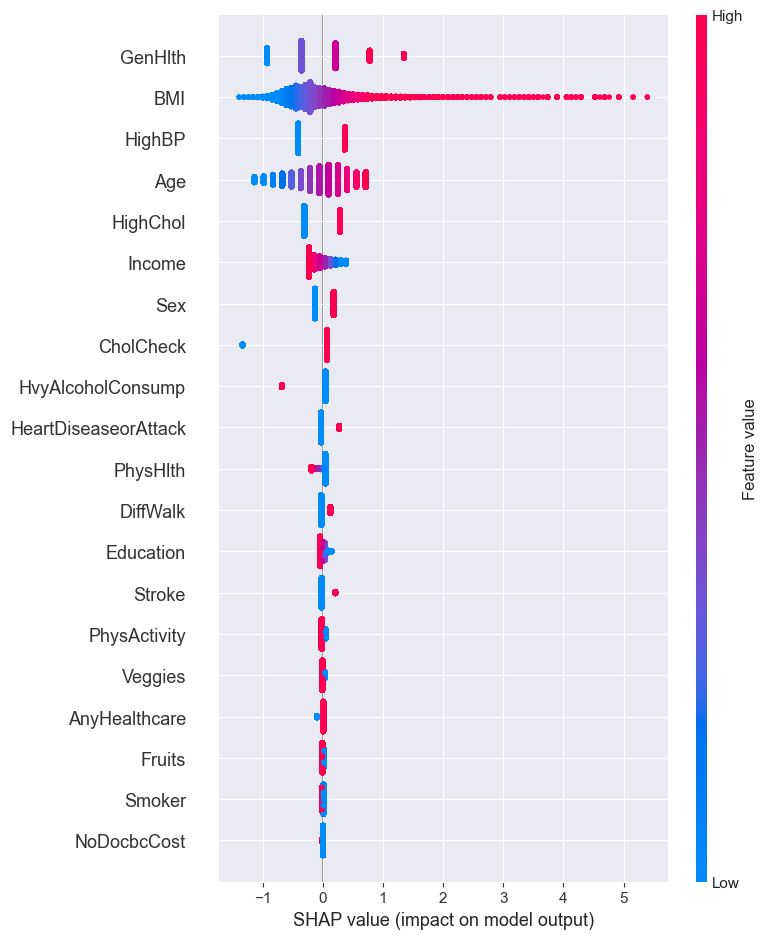

In [81]:
explainer = shap.LinearExplainer(modell, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

plt.figure()

shap.summary_plot(shap_values, X_test, show=False)

plt.savefig("lr_shap_summary.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

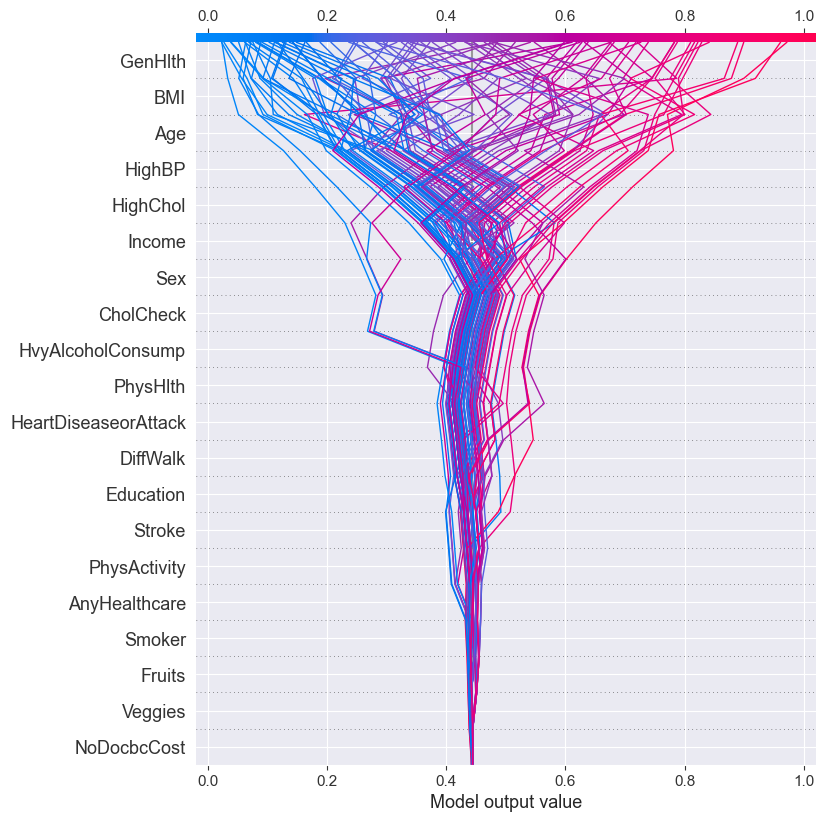

In [62]:
np.random.seed(42)  # für Reproduzierbarkeit # doi seed khaac
idxs = np.random.choice(X_test.shape[0], size=100, replace=False)

plt.figure()

shap.decision_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values[idxs],
    features=X_test.iloc[idxs],
    feature_names=X_test.columns.tolist(),
    show=False,
    link='logit'
)

plt.savefig("lr_shap_global_decision.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

C:\Users\haihu\AppData\Local\Temp\ipykernel_9140\2885760956.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)


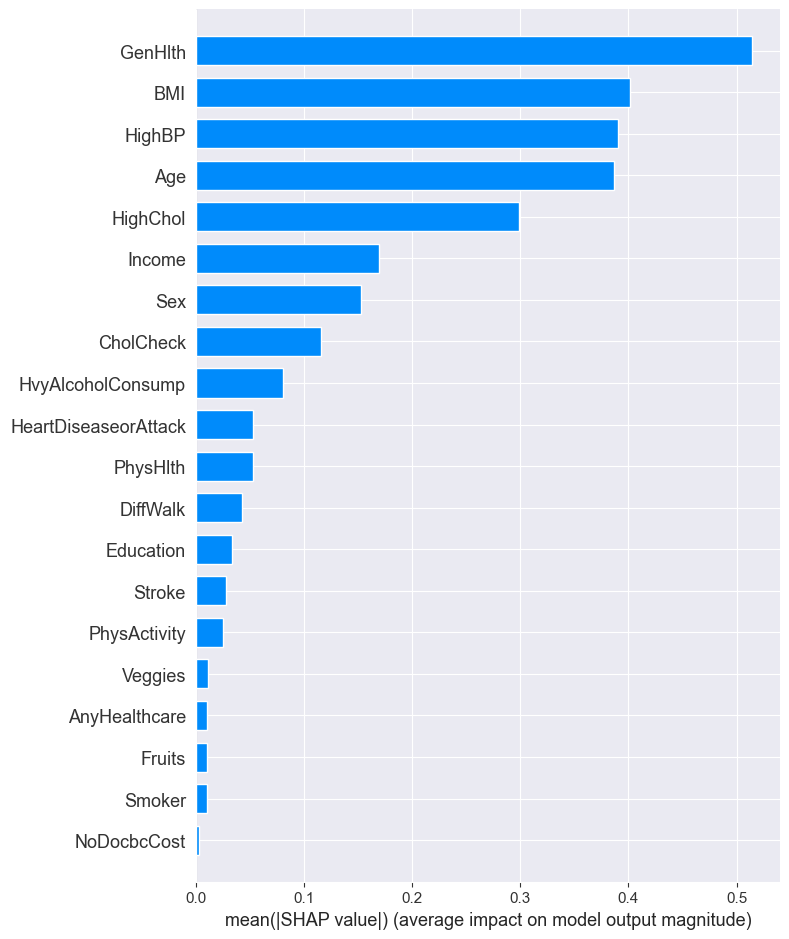

In [63]:
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.savefig("lr_shap_meanSHAP_bar.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

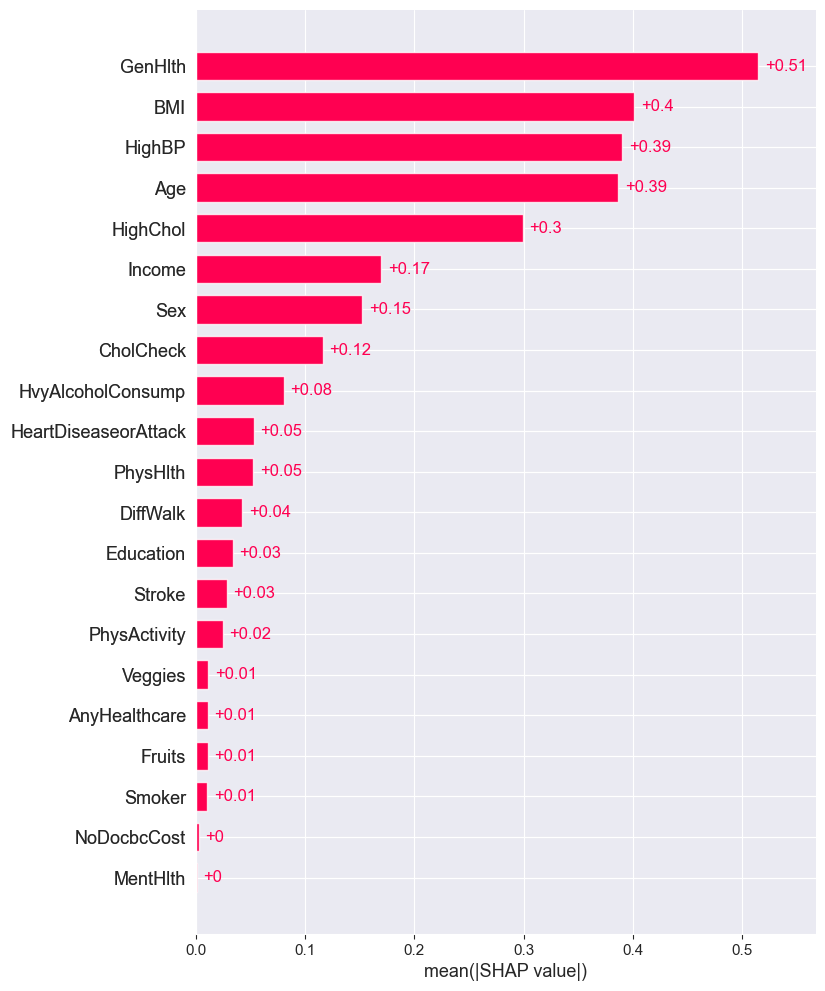

In [64]:
shap_value = explainer(X_test)

plt.figure()
shap.plots.bar(shap_value, max_display=21, show=False)
plt.savefig("lr_shap_meanSHAP_bar.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

<Figure size 640x480 with 0 Axes>

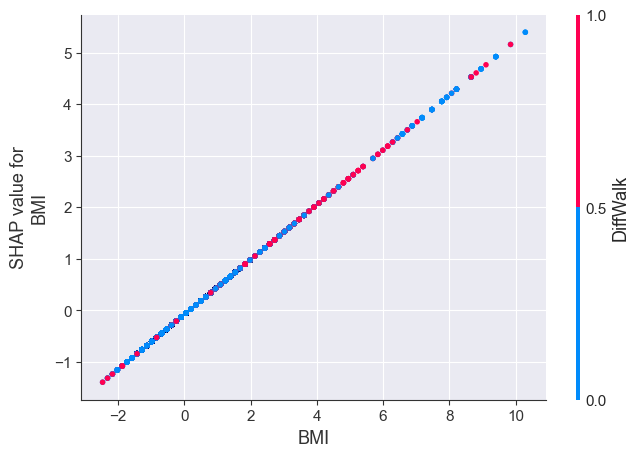

In [65]:
plt.figure()
shap.dependence_plot("BMI", shap_values, X_test, interaction_index="DiffWalk", show=False)
plt.savefig("lr_shap_dpd_bmi_diff.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

### Lokal

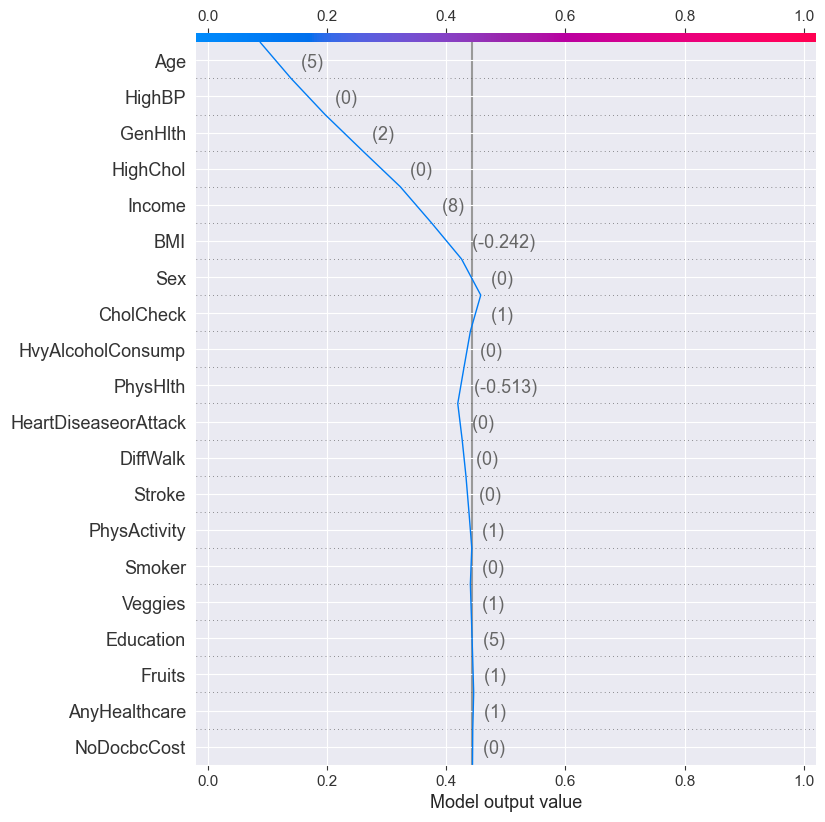

In [66]:
plt.figure()
shap.decision_plot(explainer.expected_value, shap_values[2], X_test.iloc[2], link="logit", show=False)
plt.savefig("lr_shap_lokal_2.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

In [79]:
# Perturbieren Nr. 27174 positive Änderung
obs_original_1 = X_test.iloc[2]
obs_1p = obs_original_1.copy()

obs_1p.iloc[0:3] = obs_1p.iloc[0:3] * 0.95
obs_1p['GenHlth'] = obs_1p['GenHlth'] - 1
obs_1p['Age'] = obs_1p['Age'] - 1
obs_1p['Education'] = obs_1p['Education'] + 1
obs_1p['Income'] = obs_1p['Income'] + 0 # Schon höchsten

print(obs_1p)

BMI                    -0.230328
MentHlth               -0.427943
PhysHlth               -0.486977
HighBP                  0.000000
HighChol                0.000000
CholCheck               1.000000
Smoker                  0.000000
Stroke                  0.000000
HeartDiseaseorAttack    0.000000
PhysActivity            1.000000
Fruits                  1.000000
Veggies                 1.000000
HvyAlcoholConsump       0.000000
AnyHealthcare           1.000000
NoDocbcCost             0.000000
GenHlth                 1.000000
DiffWalk                0.000000
Sex                     0.000000
Age                     4.000000
Education               6.000000
Income                  8.000000
Name: 27174, dtype: float64


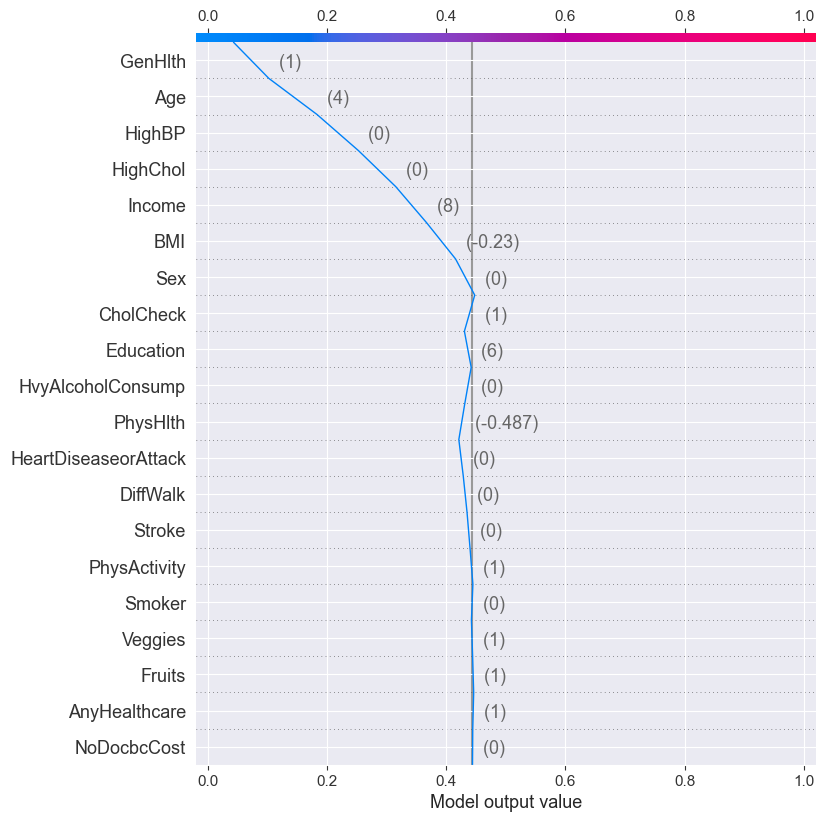

In [83]:
plt.figure()
shap_values_1p = explainer.shap_values(obs_1p)
shap.decision_plot(explainer.expected_value, shap_values_1p, obs_1p, link="logit", show=False)
plt.savefig("lr_shap_lokal_2p.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

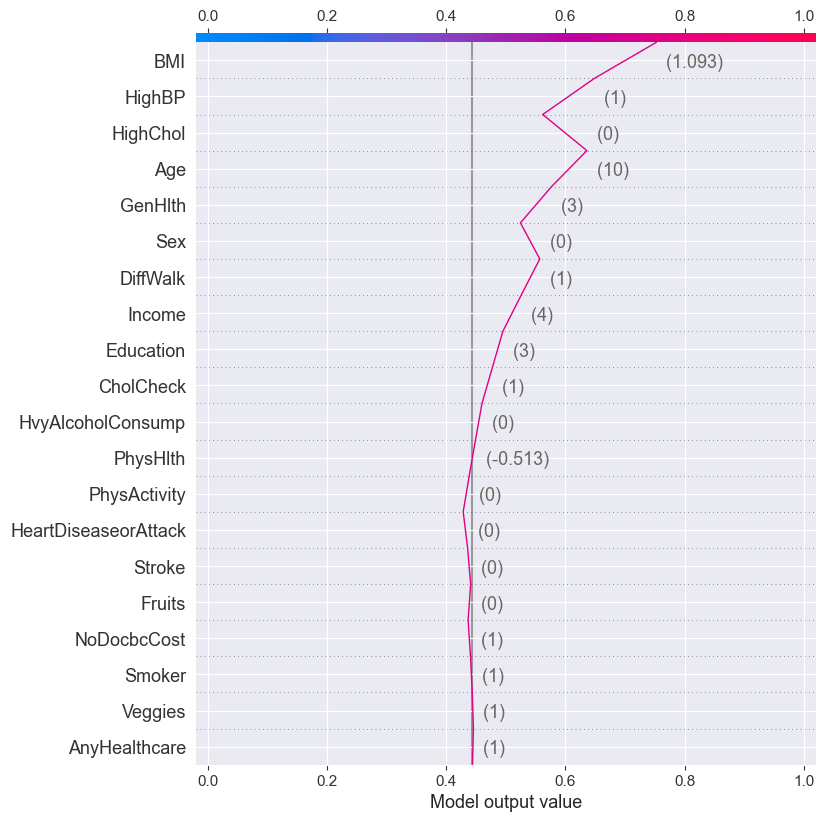

In [68]:
plt.figure()
shap.decision_plot(explainer.expected_value, shap_values[1], X_test.iloc[1], link="logit", show=False)
plt.savefig("lr_shap_lokal_1.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

<Figure size 640x480 with 0 Axes>

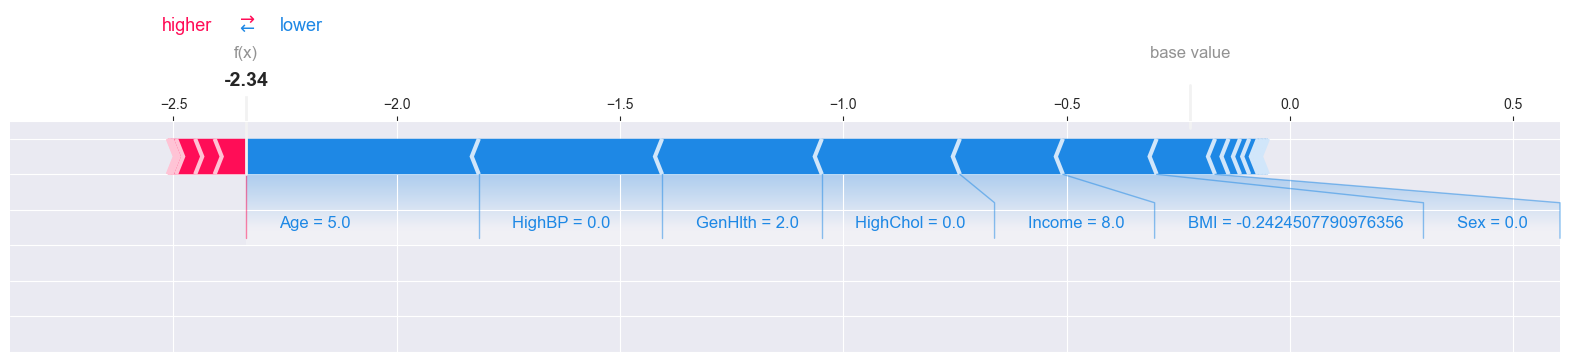

In [69]:
plt.figure()
force_plot = shap.force_plot(explainer.expected_value, shap_values[2], X_test.iloc[2], matplotlib=True, show=False)
plt.savefig("lr_shap_force_lokal_2.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()


<Figure size 640x480 with 0 Axes>

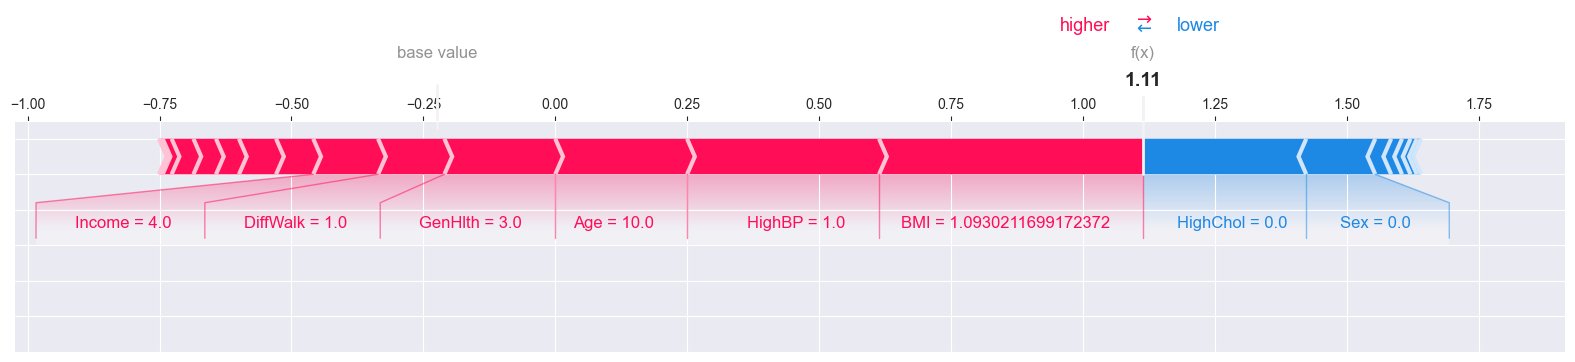

In [70]:
plt.figure()
shap.force_plot(explainer.expected_value, shap_values[1], X_test.iloc[1], matplotlib=True, show=False)
plt.savefig("lr_shap_force_lokal_1.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

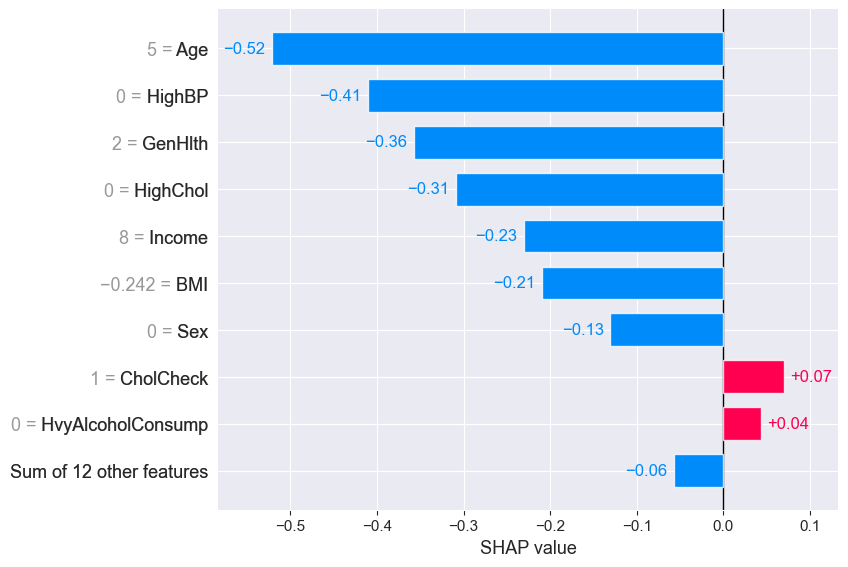

In [71]:
shap_value = explainer(X_test)

plt.figure()
shap.plots.bar(shap_value[2], show=False)

plt.savefig("lr_shap_bar_lokal_2.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )

plt.show()

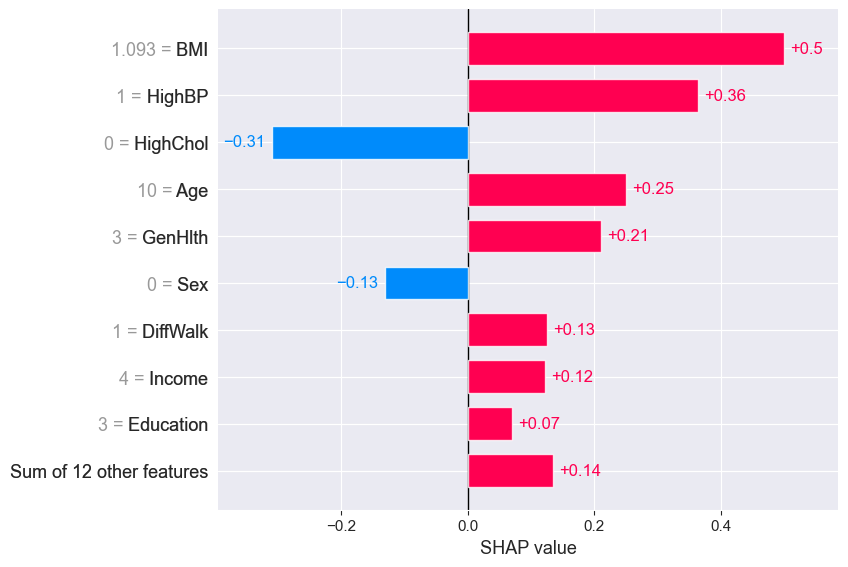

In [72]:
shap_value = explainer(X_test)

plt.figure()
shap.plots.bar(shap_value[1], show=False)
plt.savefig("lr_shap_bar_lokal_1.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

## Analyse der Erklärbarkeit von Logistische Regression Modell durch LIME

In [73]:
explainer = LimeTabularExplainer(
    training_data    = X_train.values,          # numpy-Array, nicht DataFrame
    feature_names    = X_train.columns.tolist(),# oder feature_names
    class_names      = ['Kein Diabetes', 'Diabetes'],  # deine Labels
    mode             = 'classification',
    discretize_continuous = True,
    random_state = 42
)

predict_proba = modell.predict_proba

# Erkläre den ersten Testpunkt:
idx = 2
exp = explainer.explain_instance(
    data_row        = X_test.iloc[idx].values,  # ebenfalls numpy-Array
    predict_fn      = predict_proba,            # deine predict_proba-Funktion
    num_features    = 10,                       # max. 10 einflussreiche Features
    top_labels      = 1
)

explanation_list = exp.as_list(label=exp.top_labels[0])
print("Feature-Beitrag zur Klassenzuordnung:")
for feature, weight in explanation_list:
    print(f"{feature:30s}  →  {weight:+.3f}")

Feature-Beitrag zur Klassenzuordnung:
GenHlth <= 2.00                 →  +0.193
Age <= 6.00                     →  +0.153
HighBP <= 0.00                  →  +0.143
HvyAlcoholConsump <= 0.00       →  -0.116
HighChol <= 0.00                →  +0.110
Sex <= 0.00                     →  +0.060
-0.69 < BMI <= -0.24            →  +0.058
Stroke <= 0.00                  →  +0.055
6.00 < Income <= 8.00           →  +0.051
HeartDiseaseorAttack <= 0.00    →  +0.050


C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [74]:
fig = exp.as_pyplot_figure(label=exp.top_labels[0])
fig.savefig(
    "lr_lime_exp_keindiabetes.png",
    dpi=300,
    bbox_inches='tight',
    format='png',
    facecolor='w'
)

In [75]:
explainer = LimeTabularExplainer(
    training_data    = X_train.values,          # numpy-Array, nicht DataFrame
    feature_names    = X_train.columns.tolist(),# oder feature_names
    class_names      = ['Kein Diabetes', 'Diabetes'],  # deine Labels
    mode             = 'classification',
    discretize_continuous = True,
    random_state=42
)

predict_proba = modell.predict_proba

# Erkläre den ersten Testpunkt:
idx = 1
exp = explainer.explain_instance(
    data_row        = X_test.iloc[idx].values,  # ebenfalls numpy-Array
    predict_fn      = predict_proba,            # deine predict_proba-Funktion
    num_features    = 10,                       # max. 10 einflussreiche Features
    top_labels      = 1                         # erkläre nur die vorhergesagte Klasse
)

explanation_list = exp.as_list(label=exp.top_labels[0])
print("Feature-Beitrag zur Klassenzuordnung:")
for feature, weight in explanation_list:
    print(f"{feature:30s}  →  {weight:+.3f}")

Feature-Beitrag zur Klassenzuordnung:
BMI > 0.50                      →  +0.229
0.00 < HighBP <= 1.00           →  +0.141
HighChol <= 0.00                →  -0.110
HvyAlcoholConsump <= 0.00       →  +0.110
Income <= 5.00                  →  +0.068
2.00 < GenHlth <= 3.00          →  +0.063
Sex <= 0.00                     →  -0.061
8.00 < Age <= 10.00             →  +0.059
Stroke <= 0.00                  →  -0.052
HeartDiseaseorAttack <= 0.00    →  -0.048


C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [76]:
fig2 = exp.as_pyplot_figure(label=exp.top_labels[0])
fig2.savefig(
    "lr_lime_exp_diabetes.png",
    dpi=300,
    bbox_inches='tight',
    format='png',
    facecolor='w'
)

C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid featu

Globale Features (nach Auftreten):
HighBP <= 0.00               60
HighChol <= 0.00             58
GenHlth <= 2.00              52
0.00 < HighChol <= 1.00      42
0.00 < HighBP <= 1.00        40
HvyAlcoholConsump <= 0.00    31
BMI <= -0.69                 30
2.00 < GenHlth <= 3.00       29
Age <= 6.00                  26
Age > 10.00                  26
Name: count, dtype: int64


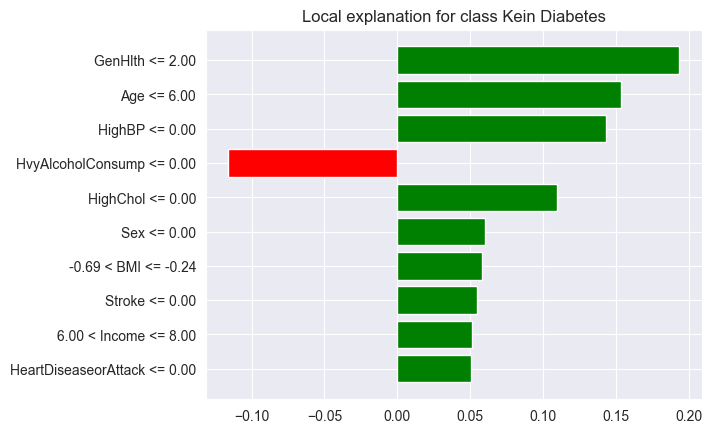

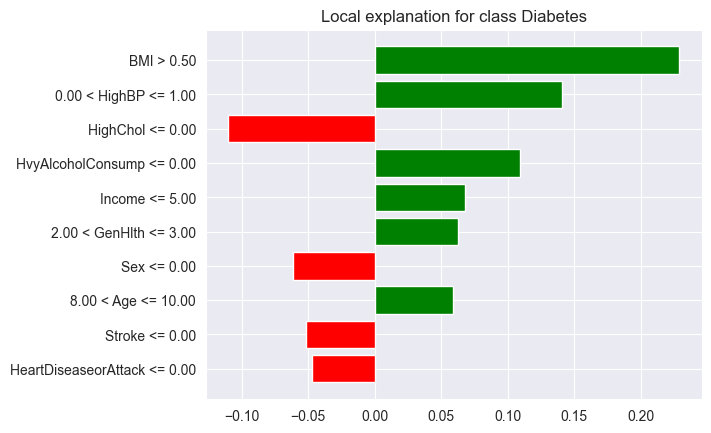

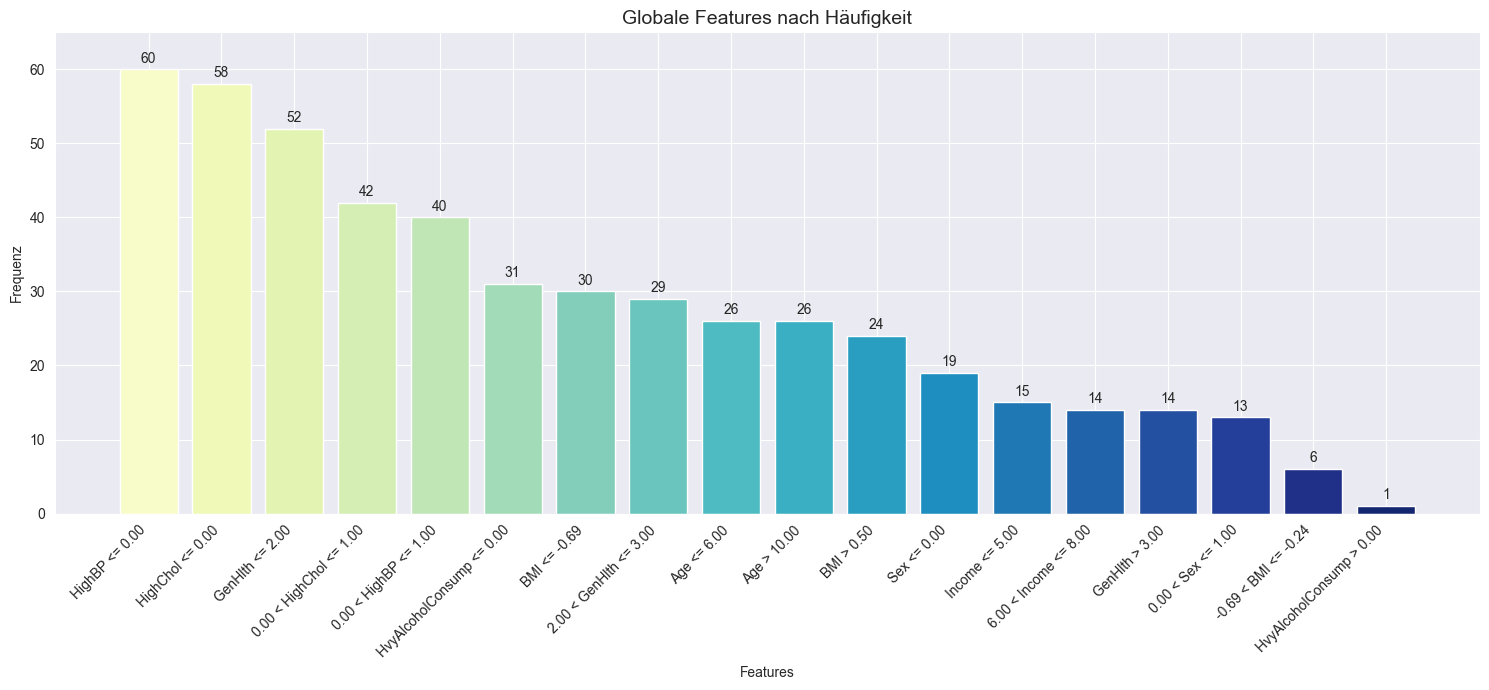

In [77]:
np.random.seed(42)
n_samples = 100
idxs = np.random.choice(len(X_test), size=n_samples, replace=False)

all_feats = []
for idx in idxs:
    exp = explainer.explain_instance(
        data_row    = X_test.iloc[idx].values,
        predict_fn  = modell.predict_proba,
        num_features= 5,
        top_labels  = 1
    )
    lab = exp.top_labels[0]
    feats = [f for f, w in exp.as_list(label=lab)]  # nur Feature-Namen
    all_feats.extend(feats)


freq = pd.Series(all_feats).value_counts()

# Tabelle
print("Globale Features (nach Auftreten):")
print(freq.head(10))


# Plot
plt.figure(figsize=(15, 7))
colors = sns.color_palette("YlGnBu", n_colors=len(freq))
bars = plt.bar(freq.index, freq.values, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f"{int(height)}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequenz')
plt.xlabel('Features')
plt.ylim(0, 65)
plt.title('Globale Features nach Häufigkeit', fontsize=14)

plt.tight_layout()

plt.savefig(
    "lr_lime_exp_global.png",
    dpi=300,
    bbox_inches='tight',
    format='png',
    facecolor='w'
)

plt.show()